<a href="https://colab.research.google.com/github/sean-halpin/data_vis/blob/main/data_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

You are required to explain what you plan on doing with the data.
 - Why did you chose the specific visualizations? 
 - Why did you choose specific observations for a visualization
 - How did you Engineer your Data? 

Let's take a peak at the data by loading it into a pandas dataframe and printing a few lines

In [3]:
df=pd.read_csv("fortune500.csv")
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


Let's see what the inferred data types are for these columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


Profit coming back as an object types seems suspicious, lets check it for non numeric values. 

In [5]:
non_numberic_profits = df['Profit (in millions)'].str.contains('[^0-9.-]')
df_non_numeric_profits = df.loc[non_numberic_profits]
df_non_numeric_profits.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


Lets visualise how many rows per year have non numeric profits

In [8]:
df.Year.unique()

array([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005])

(array([ 6.,  2.,  3.,  3.,  3.,  1.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  7.,  8.,  7.,  7.,  6.,  7.,  7.,  9.,  9.,  7.,
         8., 10.,  9., 11., 13., 23., 23., 20., 24., 19., 20., 21., 16.,
        16.,  6.,  6.,  4.,  3.,  3.,  4.,  3.,  4.,  5.,  1.]),
 array([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
        1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
        1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
        1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
        1999, 2000, 2001, 2002, 2003, 2004, 2005]),
 <a list of 50 Patch objects>)

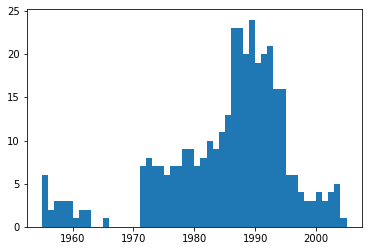

In [10]:
import matplotlib.pyplot as plt
plt.hist(df_non_numeric_profits.Year, bins=range(1955, 2005+1))

We have a lot of data missing Profits between 1971 and 2004

This shouldn't affect our analysis too much considering we have 25500 data points. 
Let's remove these rows

In [287]:
df = df.loc[~non_numberic_profits]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25131 entries, 0 to 25499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25131 non-null  int64  
 1   Rank                   25131 non-null  int64  
 2   Company                25131 non-null  object 
 3   Revenue (in millions)  25131 non-null  float64
 4   Profit (in millions)   25131 non-null  float64
 5   decade                 25131 non-null  int64  
 6   profit_diff_1990       25131 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.5+ MB


In [12]:
df.describe()

,Year,Rank,Revenue (in millions)
count,25131.000000,25131.000000,25131.000000
mean,1979.926784,249.744777,4304.961780
std,14.764827,144.443000,11396.723687
min,1955.000000,1.000000,49.700000
25%,1967.000000,124.000000,357.900000
50%,1980.000000,250.000000,1017.600000
75%,1993.000000,375.000000,3916.100000
max,2005.000000,500.000000,288189.000000


# Plots 
Generate a plot that details the 5 top Companies by Revenue for each Decade.
 - Top 5 for 1950-1959, 1960-1969 etc. 
 - This Must be a Single plot either static
or interactive. 

Let's convert our remaining Profit values to numerics, to ensure we don't have strings that could affect our plots. 

In [13]:
df['Profit (in millions)'] = df['Profit (in millions)'].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25131 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25131 non-null  int64  
 1   Rank                   25131 non-null  int64  
 2   Company                25131 non-null  object 
 3   Revenue (in millions)  25131 non-null  float64
 4   Profit (in millions)   25131 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ MB


Let's add a column for each entry, indicating the decade in which that datapoint belongs. 

In [45]:
df['decade'] = df.apply(lambda x: int(x.Year/10)*10, axis=1)
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions),decade
0,1955,1,General Motors,9823.5,806.0,1950
1,1955,2,Exxon Mobil,5661.4,584.8,1950
2,1955,3,U.S. Steel,3250.4,195.4,1950
3,1955,4,General Electric,2959.1,212.6,1950
4,1955,5,Esmark,2510.8,19.1,1950


Now, let's sanity check the decades we have inferred. 

In [85]:
df.decade.unique()

array([1950, 1960, 1970, 1980, 1990, 2000])

In [86]:
len(df.decade.unique())

6

Let's group the data points by decade and Company, so we can sum & sort the Revenue total for the decade for each Company. 

This should give us the data we need for our plot. 

In [288]:
df_decade = df.groupby(["decade","Company"], as_index=False).sum().sort_values("Revenue (in millions)", ascending=False)
df_decade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 3070 to 265
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   decade                 4346 non-null   int64  
 1   Company                4346 non-null   object 
 2   Year                   4346 non-null   int64  
 3   Rank                   4346 non-null   int64  
 4   Revenue (in millions)  4346 non-null   float64
 5   Profit (in millions)   4346 non-null   float64
 6   profit_diff_1990       4346 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 271.6+ KB


In [92]:
agg_decade = df_decade[['decade', 'Company', 'Revenue (in millions)',	'Profit (in millions)']]
agg_decade.head()

,decade,Company,Revenue (in millions),Profit (in millions)
3070,1990,General Motors,1473915.0,3151.6
4314,2000,Wal-Mart Stores,1373311.0,45703.0
3902,2000,Exxon Mobil,1232291.0,99250.0
3043,1990,Ford Motor,1204086.7,40465.1
3939,2000,General Motors,1126875.2,19418.0


In [95]:
agg_decade.loc[agg_decade['decade'] == 1950]

,decade,Company,Revenue (in millions),Profit (in millions)
254,1950,General Motors,53575.0,4320.1
217,1950,Exxon Mobil,34434.5,3470.3
231,1950,Ford Motor,20142.6,1052.1
567,1950,U.S. Steel,19463.0,1634.6
250,1950,General Electric,18601.0,1118.1
...,...,...,...,...
352,1950,Liquid Carbonic,51.4,2.8
563,1950,Truax-Traer Coal,50.5,2.5
96,1950,Bullard,50.2,4.8
176,1950,Cuban-American Sugar,50.1,0.7


Let's grab the revenue values for each company per decade, sort them and take the top 5 for each decade. 

In [119]:
dec1 = agg_decade.loc[agg_decade['decade'] == 1950].sort_values("Revenue (in millions)", ascending=False).head()
dec2 = agg_decade.loc[agg_decade['decade'] == 1960].sort_values("Revenue (in millions)", ascending=False).head()
dec3 = agg_decade.loc[agg_decade['decade'] == 1970].sort_values("Revenue (in millions)", ascending=False).head()
dec4 = agg_decade.loc[agg_decade['decade'] == 1980].sort_values("Revenue (in millions)", ascending=False).head()
dec5 = agg_decade.loc[agg_decade['decade'] == 1990].sort_values("Revenue (in millions)", ascending=False).head()
dec6 = agg_decade.loc[agg_decade['decade'] == 2000].sort_values("Revenue (in millions)", ascending=False).head()

In [120]:
dec6

,decade,Company,Revenue (in millions),Profit (in millions)
4314,2000,Wal-Mart Stores,1373311.0,45703.0
3902,2000,Exxon Mobil,1232291.0,99250.0
3939,2000,General Motors,1126875.2,19418.0
3924,2000,Ford Motor,1005927.0,8253.0
3937,2000,General Electric,785644.0,82849.0


Let's merge all those data sets from each decade so we can show them on a singple plot. 

In [121]:
plot_data = dec1.append(dec2, ignore_index=True)
plot_data = plot_data.append(dec3, ignore_index=True)
plot_data = plot_data.append(dec4, ignore_index=True)
plot_data = plot_data.append(dec5, ignore_index=True)
plot_data = plot_data.append(dec6, ignore_index=True)

Now we cam visualise the top 5 companies by revenue per decade on a bar plot. 
The Companies are grouped by their decade on the Y-Axis and the X-Axis shows the Revenue Sum for the decade in millions of dollars. 

I've chosen a barplot for this , because it is easy to visualise the groups and also the increases & relative levels across companies & decades. 

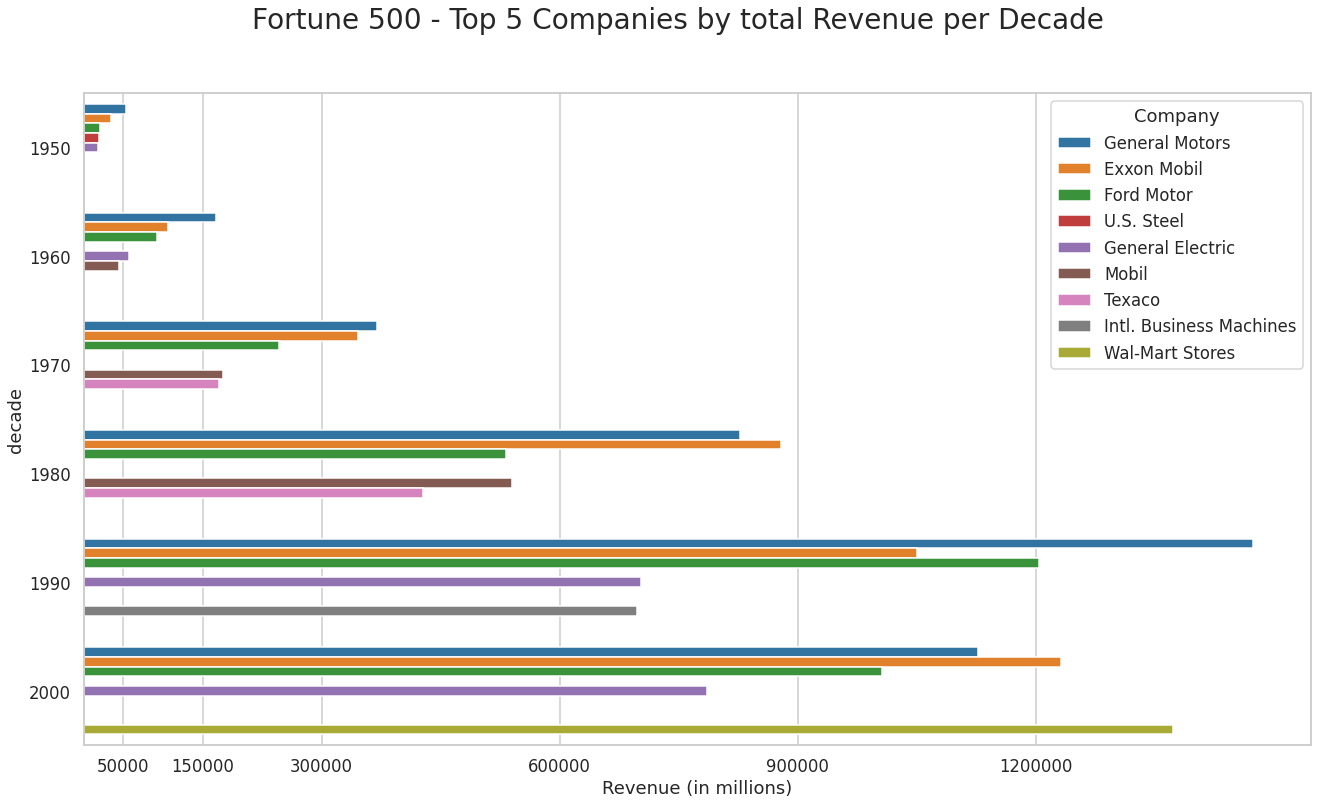

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
plt.ticklabel_format(style='plain', axis='x')
ax = sns.barplot(x="Revenue (in millions)", y="decade", hue='Company', orient="h",data=plot_data)
ax.set(xticks=[50000,150000,300000,600000,900000,1200000]);
plt.suptitle("Fortune 500 - Top 5 Companies by total Revenue per Decade", fontsize=28);

# Distribution of Revenue

 - Plot a graph depicting the distribution of the “Revenue” in the top 20
Companies in 1971. 

Let's now grab all our data for the year 1971. 
Sort by highest revenue and grab the top 20 results. 

In [145]:
rev_top20 = df.loc[df['Year'] == 1971].sort_values("Revenue (in millions)", ascending=False).head(20)
rev_top20

,Year,Rank,Company,Revenue (in millions),Profit (in millions),decade
8000,1971,1,General Motors,18752.4,609.1,1970
8001,1971,2,Exxon Mobil,16554.2,1309.5,1970
8002,1971,3,Ford Motor,14979.9,515.7,1970
8003,1971,4,General Electric,8726.7,328.5,1970
8004,1971,5,Intl. Business Machines,7504.0,1017.5,1970
8005,1971,6,Mobil,7260.5,482.7,1970
8006,1971,7,Chrysler,6999.7,-7.6,1970
8007,1971,8,ITT Industries,6364.5,353.3,1970
8008,1971,9,Texaco,6349.8,822.0,1970
8009,1971,10,AT&T Technologies,5856.2,253.4,1970


Let's now plot the revenue distribution using a displot.
I've chosen a distibution plot because it is simple to visualise how often a certain amount of revenue has occured. 

<Figure size 15840x864 with 0 Axes>

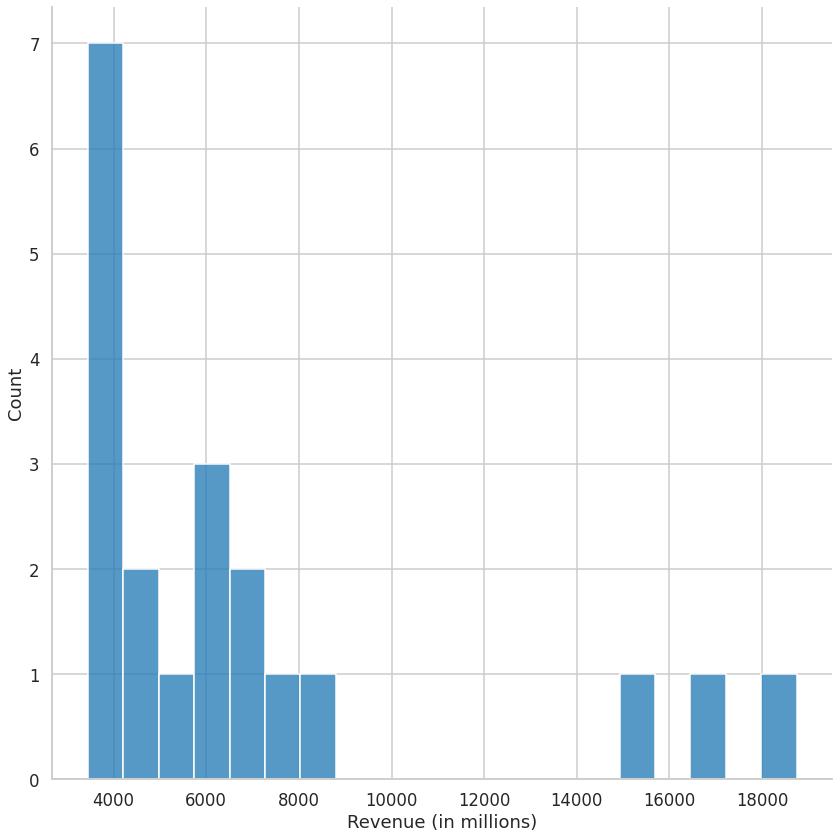

In [311]:
import seaborn as sns
plt.figure(figsize=(220,12))
_ = sns.displot(x="Revenue (in millions)", multiple="dodge",data = rev_top20, bins=20, height=12)

# Highest Performing Companies

 - Find out and visualize which Top 10 Companies profit increased the most
between 1990 and 1999 
 - This Must be a Single plot either static or interactive. 

Let's find the diff to every row in Profit column, when compared to 1990. 

In [265]:
def get_profit(comp, year):
  try:
    ret = df.loc[(df['Year'] == year) & (df['Company'] == comp)]['Profit (in millions)']
    if (ret > 0):
      return ret
    else:
      return 0
  except Exception as e:
    # print(e)
    return 0

df['profit_diff_1990'] = df.apply(lambda x: x['Profit (in millions)'] - get_profit(x.Company, 1990), axis=1)
df

,Year,Rank,Company,Revenue (in millions),Profit (in millions),decade,profit_diff_1990
0,1955,1,General Motors,9823.5,806.0,1950,806.0
1,1955,2,Exxon Mobil,5661.4,584.8,1950,584.8
2,1955,3,U.S. Steel,3250.4,195.4,1950,195.4
3,1955,4,General Electric,2959.1,212.6,1950,212.6
4,1955,5,Esmark,2510.8,19.1,1950,19.1
...,...,...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493.0,2000,493.0
25496,2005,497,Peabody Energy,3631.6,175.4,2000,175.4
25497,2005,498,Wendy's International,3630.4,57.8,2000,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6,2000,70.6


Now let's select our data points from 1999, sort them by our new profit diff column and take the 10 biggest values. 

In [269]:
top_ten = df.loc[(df['Year'] == 1999)].sort_values("profit_diff_1990", ascending=False).head(10)
top_ten

,Year,Rank,Company,Revenue (in millions),Profit (in millions),decade,profit_diff_1990
22001,1999,2,Ford Motor,144416.0,22071.0,1990,22071.0
22004,1999,5,General Electric,100469.0,9296.0,1990,9296.0
22009,1999,10,AT&T,53588.0,6398.0,1990,6398.0
22003,1999,4,Exxon Mobil,100697.0,6370.0,1990,6370.0
22005,1999,6,Intl. Business Machines,81667.0,6328.0,1990,6328.0
22039,1999,40,Intel,26273.0,6068.0,1990,6068.0
22006,1999,7,Citigroup,76431.0,5807.0,1990,5807.0
22007,1999,8,Altria Group,57813.0,5372.0,1990,5372.0
22036,1999,37,Merck,26898.2,5248.2,1990,5248.2
22010,1999,11,Bank of America Corp.,50777.0,5165.0,1990,5165.0


Let's sanity check the companies seen in this top 10. 

In [272]:
top_ten_companies = top_ten.Company.unique()
top_ten_companies

array(['Ford Motor', 'General Electric', 'AT&T', 'Exxon Mobil',
       'Intl. Business Machines', 'Intel', 'Citigroup', 'Altria Group',
       'Merck', 'Bank of America Corp.'], dtype=object)

In [312]:
len(top_ten_companies)

10

In [278]:
top_ten_data = df.loc[(df['Company'].isin(top_ten_companies)) & (df['Year'].between(1990,1999))]
top_ten_data

,Year,Rank,Company,Revenue (in millions),Profit (in millions),decade,profit_diff_1990
17501,1990,2,Ford Motor,96932.6,3835.0,1990,3835.0
17502,1990,3,Exxon Mobil,86656.0,3510.0,1990,3510.0
17503,1990,4,Intl. Business Machines,63438.0,3758.0,1990,3758.0
17504,1990,5,General Electric,55264.0,3939.0,1990,3939.0
17506,1990,7,Altria Group,39069.0,2946.0,1990,2946.0
...,...,...,...,...,...,...,...
22007,1999,8,Altria Group,57813.0,5372.0,1990,5372.0
22009,1999,10,AT&T,53588.0,6398.0,1990,6398.0
22010,1999,11,Bank of America Corp.,50777.0,5165.0,1990,5165.0
22036,1999,37,Merck,26898.2,5248.2,1990,5248.2


Let's plot the top 10 companies by revenue difference over the years 1990 to 1999. We use a line plot for this with color coding by company, this makes it easy to visualise the relative position each year & also what the profit was for that year. 

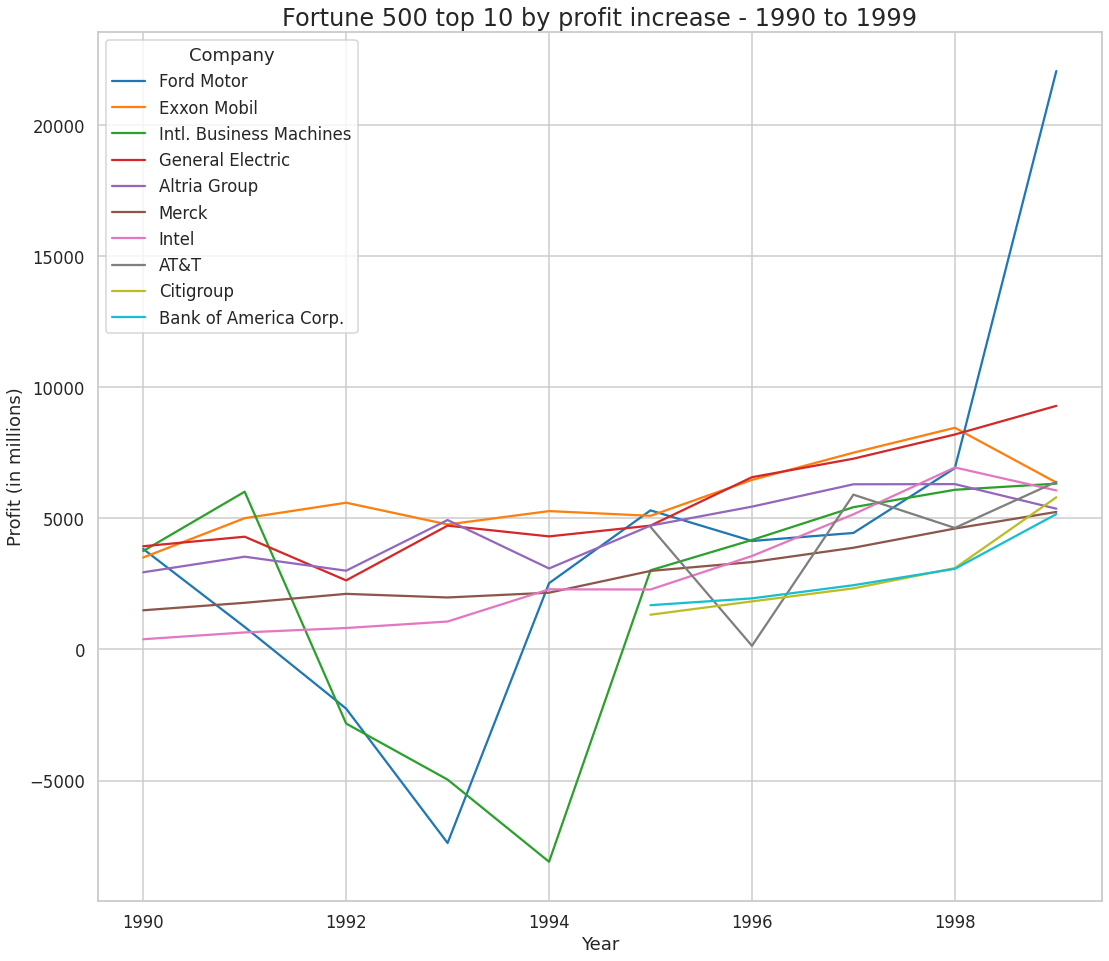

In [286]:
plt.figure(figsize=(18, 16))
ax = sns.lineplot(x="Year", 
                  y="Profit (in millions)",
                  hue="Company",
                  data=top_ten_data)
ax.set_title('Fortune 500 top 10 by profit increase - 1990 to 1999', fontsize=24);

# Revenue by Decade 

 - Observe and plot the average revenue by decade
 - This Must be a Single plot
either static or interactive. 